In [71]:
%matplotlib inline

import collections
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model

from sklearn import svm

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier




from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices


from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# -*- coding: utf-8 -*-

数据预处理

In [72]:

#-------------------------问题1 预处理--------------------------------

df1=pd.read_excel('附件.xlsx',sheet_name='表单1',dtype='object')
df2=pd.read_excel('附件.xlsx',sheet_name='表单2')
df2=df2.fillna(0)                     #缺失值用0替代
number_of_sample2=df2.loc[:,'文物采样点'] 
number_of_sample1=df1.loc[:,'文物编号']
new_column=[]
new_column2=[]
for i in number_of_sample2:
    for j in number_of_sample1:
        if i[0:2]==j:
            row_of_j=df1[df1.文物编号==j].index.tolist()[0]
            new_column.append(df1.iloc[row_of_j,2])
            new_column2.append(df1.iloc[row_of_j,4])
df2.insert(15,'文物类型',new_column)
df2.insert(16,'有无风化',new_column2)#将表单一中的文物类型和有无风化合并到表二中
df2.drop([17,19],axis=0,inplace=True)
# df2.to_excel('表2预处理.xlsx')


问题1_1

In [73]:
df1.dropna(axis=0,how='any',inplace=True)
df1.columns=['number','pattern','type','color','airslake']
df1['airslake'].replace({'无风化':-1,'风化':1},inplace=True)
df1['type'].replace({'高钾':'K','铅钡':'Ba'},inplace=True)
for i in range(0,df1.shape[0]):
    for j in range(0,df2.shape[0]):
        if df1.iloc[i,0][0:2]==df2.iloc[j,0][0:2] and len(df2.iloc[j,0])>=3 and df2.iloc[j,0][2]=='未':
            df1.iloc[i,4]=0
          
        
#----------------多因素分析-------------------        
model=smf.ols('airslake ~pattern+type+color+pattern*type+pattern*color+type*color+pattern*type*color',data=df1).fit()
print(anova_lm(model))


#----------------多重比较分析具体哪个类型或纹饰的风化程度差异性最显著--------------
print(pairwise_tukeyhsd(df1['airslake'],df1['pattern']))
print(pairwise_tukeyhsd(df1['airslake'],df1['type']))


                      df     sum_sq   mean_sq          F    PR(>F)
pattern              2.0  10.869048  5.434524  12.195585  0.000081
type                 1.0   9.524382  9.524382  21.373613  0.000043
color                7.0   5.363720  0.766246   1.719528  0.133643
pattern:type         2.0   3.542343  1.771172   3.974677  0.027076
pattern:color       14.0   1.320793  0.094342   0.211713  0.998444
type:color           7.0   6.152761  0.878966   1.972482  0.084747
pattern:type:color  14.0   6.698374  0.478455   1.073699  0.409659
Residual            38.0  16.933333  0.445614        NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B      1.5 0.0007   0.583   2.417   True
     A      C   0.5357 0.0737  -0.041  1.1125  False
     B      C  -0.9643   0.03 -1.8505 -0.0781   True
----------------------------------------------------
Multiple Comparison of Mea

问题1_2

In [74]:
#---------------问题1-2数据筛选----------------
# df2.to_csv('表2.csv')
df2_3=pd.read_csv('表2.csv',encoding="gbk")
df2_3['文物类型'].replace({'高钾':1,'铅钡':0},inplace=True)
#手动预处理：表面风化：{-1，0，1}，-1为未风化玻璃的监测点，0为风化玻璃的未风化监测点，1为风化玻璃的风化监测点
df2_3.dropna(axis=0,how='any',inplace=True)

df2_clip=df2_3.loc[:,['有无风化','二氧化硅(SiO2)','氧化钠(Na2O)','氧化钾(K2O)','氧化钙(CaO)',
                 '氧化镁(MgO)','氧化铝(Al2O3)','氧化铁(Fe2O3)','氧化铜(CuO)',
                 '氧化铅(PbO)','氧化钡(BaO)','五氧化二磷(P2O5)','氧化锶(SrO)','氧化锡(SnO2)','二氧化硫(SO2)','文物类型']]

K=df2_clip[df2_clip['文物类型']==1]  #高钾玻璃数据
PB=df2_clip[df2_clip['文物类型']==0] #铅钡玻璃数据

C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 27687 (\N{CJK UNIFIED IDEOGRAPH-6C27}) missing from current font.
  fig.

<AxesSubplot:>

C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27687 (\N{CJK UN

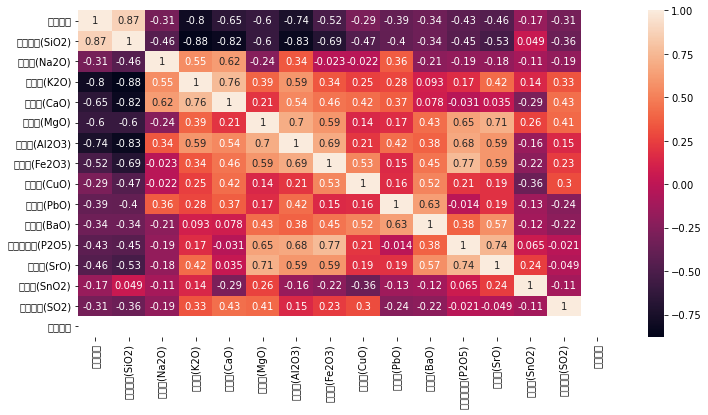

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(K.corr(), annot=True)
# plt.savefig('高钾玻璃——风化化学成分相关性.jpg')

In [40]:
K.corr()['有无风化'].sort_values(ascending=False)   #对高钾玻璃风化化学成分 相关性排序

有无风化           1.000000
二氧化硅(SiO2)     0.871085
氧化锡(SnO2)     -0.171499
氧化铜(CuO)      -0.289577
氧化钠(Na2O)     -0.309656
二氧化硫(SO2)     -0.313783
氧化钡(BaO)      -0.344848
氧化铅(PbO)      -0.388389
五氧化二磷(P2O5)   -0.425184
氧化锶(SrO)      -0.460756
氧化铁(Fe2O3)    -0.516242
氧化镁(MgO)      -0.601397
氧化钙(CaO)      -0.654337
氧化铝(Al2O3)    -0.739433
氧化钾(K2O)      -0.803083
文物类型                NaN
Name: 有无风化, dtype: float64

C:\Users\20248\AppData\Local\Temp\ipykernel_13720\1120585245.py:3: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  plt.savefig('铅钡玻璃——风化化学成分相关性.jpg')
C:\Users\20248\AppData\Local\Temp\ipykernel_13720\1120585245.py:3: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from current font.
  plt.savefig('铅钡玻璃——风化化学成分相关性.jpg')
C:\Users\20248\AppData\Local\Temp\ipykernel_13720\1120585245.py:3: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  plt.savefig('铅钡玻璃——风化化学成分相关性.jpg')
C:\Users\20248\AppData\Local\Temp\ipykernel_13720\1120585245.py:3: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  plt.savefig('铅钡玻璃——风化化学成分相关性.jpg')
C:\Users\20248\AppData\Local\Temp\ipykernel_13720\1120585245.py:3: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  plt.savefig('铅钡玻璃——风化化学成分相关性.jpg')
C:\Users\20248\AppData\Local\Temp\ipykernel_13720\11205

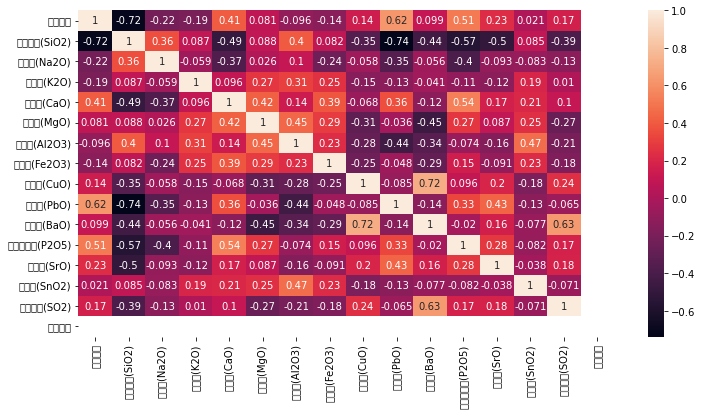

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(PB.corr(), annot=True)
# plt.savefig('铅钡玻璃——风化化学成分相关性.jpg')

In [41]:
PB.corr()['有无风化'].sort_values(ascending=False)  #对铅钡玻璃风化化学成分 相关性排序

有无风化           1.000000
氧化铅(PbO)       0.624979
五氧化二磷(P2O5)    0.511839
氧化钙(CaO)       0.406076
氧化锶(SrO)       0.229354
二氧化硫(SO2)      0.165554
氧化铜(CuO)       0.142039
氧化钡(BaO)       0.099153
氧化镁(MgO)       0.081008
氧化锡(SnO2)      0.020898
氧化铝(Al2O3)    -0.096446
氧化铁(Fe2O3)    -0.139280
氧化钾(K2O)      -0.188484
氧化钠(Na2O)     -0.215913
二氧化硅(SiO2)    -0.717179
文物类型                NaN
Name: 有无风化, dtype: float64

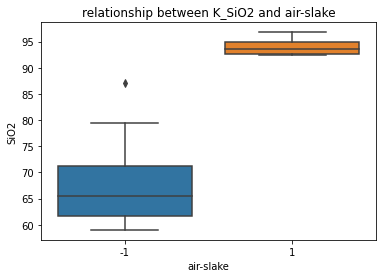

In [80]:
#化学成分相关性图示

bx1 = sns.boxplot(x='有无风化', y='二氧化硅(SiO2)', data = K)
bx1.set(xlabel='air-slake', ylabel='SiO2', title='relationship between K_SiO2 and air-slake')


bx2 = sns.boxplot(x='有无风化', y='五氧化二磷(P2O5)', data = K)
bx2.set(xlabel='air-slake', ylabel='P2O5', title='relationship between K_P2O5 and air-slake')

bx3 = sns.boxplot(x='有无风化', y='氧化锶(SrO)', data = K)
bx3.set(xlabel='air-slake', ylabel='SrO', title='relationship between K_SrO and air-slake')

bx4 = sns.boxplot(x='有无风化', y='氧化镁(MgO)', data = K)
bx4.set(xlabel='air-slake', ylabel='MgO', title='relationship between K_MgO and air-slake')

bx5 = sns.boxplot(x='有无风化', y='氧化铝(Al2O3)', data = K)
bx5.set(xlabel='air-slake', ylabel='Al2O3', title='relationship between K_Al2O3 and air-slake')

bx6 = sns.boxplot(x='有无风化', y='氧化钙(CaO)', data = K)
bx6.set(xlabel='air-slake', ylabel='CaO', title='relationship between K_CaO and air-slake')

bx7 = sns.boxplot(x='有无风化', y='氧化铁(Fe2O3)', data = K)
bx7.set(xlabel='air-slake', ylabel='Fe2O3', title='relationship between K_Fe2O3 and air-slake')

bx8 = sns.boxplot(x='有无风化', y='氧化钾(K2O)', data = K)
bx8.set(xlabel='air-slake', ylabel='K2O', title='relationship between K_K2O and air-slake')

bx9 = sns.boxplot(x='有无风化', y='氧化铅(PbO)', data = PB)
bx9.set(xlabel='air-slake', ylabel='PbO', title='relationship between PB_PbO and air-slake')

bx10 = sns.boxplot(x='有无风化', y='五氧化二磷(P2O5)', data = PB)
bx10.set(xlabel='air-slake', ylabel='P2O5', title='relationship between PB_P2O5 and air-slake')

bx11 = sns.boxplot(x='有无风化', y='氧化钙(CaO)', data = PB)
bx11.set(xlabel='air-slake', ylabel='CaO', title='relationship between PB_CaO and air-slake')

bx12 = sns.boxplot(x='有无风化', y='二氧化硅(SiO2)', data = PB)
bx12.set(xlabel='air-slake', ylabel='SiO2', title='relationship between PB_SiO2 and air-slake')

问题1_3

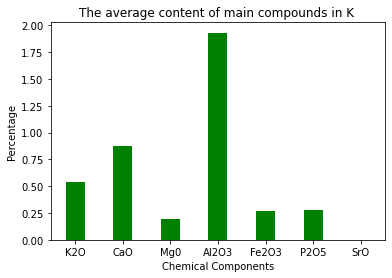

In [42]:
X=['K2O','CaO','Mg0','Al2O3','Fe2O3','P2O5','SrO']
Y=[0.543,0.870,0.197,1.93,0.265,0.280,0]
fig = plt.figure()
plt.bar(X,Y,0.4,color="green")
plt.xlabel("Chemical Components")
plt.ylabel("Percentage")
plt.title("The average content of main compounds in K ")
plt.show()

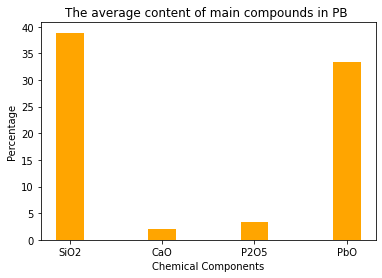

In [100]:
X=['SiO2','CaO','P2O5','PbO']
Y=[38.876,2.050,3.293,33.349]
fig = plt.figure()
plt.bar(X,Y,0.3,color="orange")
plt.xlabel("Chemical Components")
plt.ylabel("Percentage")
plt.title("The average content of main compounds in PB ")
plt.show()

问题2

In [76]:
#--------问题2数据预处理---------
df2_1=df2[df2['文物类型']=='高钾']
df2_2=df2[df2['文物类型']=='铅钡']#将表单二根据玻璃类型分成两个子表单
df2_1_chemical_1=df2_1.drop(['文物采样点'],axis=1)
df2_1_chemical_2=df2_1_chemical_1.drop(['文物类型'],axis=1)
df2_2_chemical_1=df2_2.drop(['文物采样点'],axis=1)
df2_2_chemical_2=df2_2_chemical_1.drop(['文物类型'],axis=1)#将两个子表单中的数据只保留化学成分

In [77]:
#----------------运用聚类进行亚类划分-----------------
df_chemical_K=df2_1_chemical_2.drop('有无风化',axis=1)  #高钾玻璃
inertia_scores = []
sil_scores = []
clustercenter1=[]
for n in range(2, 10) :
    cluster = KMeans(n_clusters=n).fit(df_chemical_K)
    inertia_scores.append(cluster.inertia_)
    sc = silhouette_score(df_chemical_K, cluster.labels_)
    sil_scores.append(sc)
    clustercenter1.append([cluster.cluster_centers_])
    print("n_clusters: {}\tinertia: {}\tsilhoutte_score: {}".format(
        n, cluster.inertia_, sc))
    
print(clustercenter1[1])

n_clusters: 2	inertia: 895.8502666666666	silhoutte_score: 0.6514641695284813
n_clusters: 3	inertia: 504.02454444444436	silhoutte_score: 0.5715250635027114
n_clusters: 4	inertia: 401.37838333333343	silhoutte_score: 0.3858146461124458
n_clusters: 5	inertia: 288.0079261904762	silhoutte_score: 0.4139261771941983
n_clusters: 6	inertia: 225.66509	silhoutte_score: 0.3432279029715047
n_clusters: 7	inertia: 168.43547333333342	silhoutte_score: 0.35957740709636216
n_clusters: 8	inertia: 124.52798333333341	silhoutte_score: 0.38061710565021845
n_clusters: 9	inertia: 79.70923333333337	silhoutte_score: 0.33168789456335984
[array([[ 8.10633333e+01,  5.55111512e-17,  4.87000000e+00,
         2.24000000e+00,  9.16666667e-01,  4.43333333e+00,
         7.90000000e-01,  1.35333333e+00,  4.16666667e-01,
         6.56666667e-01,  1.04000000e+00,  2.33333333e-02,
         7.86666667e-01,  0.00000000e+00],
       [ 6.36244444e+01,  9.26666667e-01,  1.08177778e+01,
         6.36333333e+00,  1.13333333e+00,  7.3

In [63]:
df_chemical_Ba=df2_2_chemical_2.drop('有无风化',axis=1)  #铅钡玻璃
inertia_scores2 = []
sil_scores2 = []
clustercenter2=[]
for n in range(2, 10) :
    cluster2 = KMeans(n_clusters=n).fit(df_chemical_Ba)
    inertia_scores2.append(cluster2.inertia_)
    sc2 = silhouette_score(df_chemical_Ba, cluster2.labels_)
    sil_scores2.append(sc2)
    clustercenter2.append([cluster2.cluster_centers_])
    print("n_clusters: {}\tinertia: {}\tsilhoutte_score: {}".format(
        n, cluster2.inertia_, sc2))
    
    
print(clustercenter2[1])

n_clusters: 2	inertia: 13063.69103452381	silhoutte_score: 0.5119292021250728
n_clusters: 3	inertia: 8808.322024350651	silhoutte_score: 0.5109766678593309
n_clusters: 4	inertia: 7011.001672717086	silhoutte_score: 0.4330584530460094
n_clusters: 5	inertia: 5537.534698131314	silhoutte_score: 0.34701021263445403
n_clusters: 6	inertia: 4413.715270416667	silhoutte_score: 0.36315430340851923
n_clusters: 7	inertia: 3802.5793543181817	silhoutte_score: 0.3353650888522665
n_clusters: 8	inertia: 3316.034240984848	silhoutte_score: 0.3539516752046214
n_clusters: 9	inertia: 2898.3132109523813	silhoutte_score: 0.32366017402529634
[array([[2.15928571e+01, 0.00000000e+00, 1.88571429e-01, 1.87142857e+00,
        1.01428571e-01, 2.00857143e+00, 2.15714286e-01, 6.55571429e+00,
        2.63442857e+01, 2.77057143e+01, 5.08428571e+00, 4.64285714e-01,
        6.93889390e-18, 5.07428571e+00],
       [5.84965000e+01, 1.97500000e+00, 1.61500000e-01, 1.19950000e+00,
        7.39000000e-01, 5.04450000e+00, 5.8000000

In [ ]:
问题3

In [64]:
X = df2_clip.iloc[:, :-1].values
y = df2_clip.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2022)

In [65]:
#随机森林
clf = RandomForestClassifier(random_state=2022)
skf = StratifiedKFold(n_splits=5)
para_list_rf = {"n_estimators": [50, 100, 150, 200, 250,300],
              'min_samples_leaf': [1, 2, 4]}
random_forest = GridSearchCV(clf, param_grid=para_list_rf, scoring='accuracy', cv=skf)
random_forest.fit(X_train, y_train)


print('Best parameters:{}'.format(random_forest.best_params_))
print('Precision on Train Set:{}'.format(random_forest.best_score_))
print('Precision on Test Set:{}'.format(random_forest.score(X_test,y_test)))
#随机森林

Best parameters:{'min_samples_leaf': 1, 'n_estimators': 50}
Precision on Train Set:1.0
Precision on Test Set:0.9285714285714286


In [66]:
#支持向量机
pipe_svm = Pipeline([('clf', svm.SVC())])
para_list_svm = dict(clf__C=[0.1, 0.3, 1, 3, 10],
                   clf__gamma=[0.1, 0.3, 1, 3, 10],
                   clf__kernel=['rbf','sigmoid','Gaussion '])
svm_clf = GridSearchCV(estimator=pipe_svm,param_grid=para_list_svm,scoring='accuracy',cv=skf)

svm_clf.fit(X_train, y_train)

print('Best parameters:{}'.format(svm_clf.best_params_))
print('Precision on Train Set:{}'.format(svm_clf.best_score_))
print('Precision on Test Set:{}'.format(svm_clf.score(X_test,y_test)))
#支持向量机

Best parameters:{'clf__C': 1, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
Precision on Train Set:0.850909090909091
Precision on Test Set:0.7142857142857143


C:\Users\20248\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\20248\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\20248\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\20248\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=see

In [67]:
#决策树
clf = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(random_state=50)),
                ('clf', DecisionTreeClassifier(random_state=50))])

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [5,10,15,20,25]
min_samples_leaf = [1,2,3,4,5]
class_weight = ['balanced', None]

param_grid =[{'clf__class_weight': class_weight,
              'clf__criterion': criterion,
              'clf__splitter': splitter,
              'clf__max_depth': max_depth,
              'clf__min_samples_leaf': min_samples_leaf}]

Decision_Tree = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='accuracy', cv=skf, verbose=1, n_jobs=-1)
Decision_Tree.fit(X_train, y_train)



print('Best parameters:{}'.format(Decision_Tree.best_params_))
print('Precision on Train Set:{}'.format(Decision_Tree.best_score_))
print('Precision on Test Set:{}'.format(Decision_Tree.score(X_test,y_test)))
#决策树

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters:{'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__splitter': 'best'}
Precision on Train Set:0.9436363636363637
Precision on Test Set:0.8571428571428571


In [68]:
df3=pd.read_csv('表3.csv',encoding='gbk')
df3.fillna(0,inplace=True)
df3.drop('文物编号',axis=1,inplace=True)
df3['表面风化'].replace({'无风化':-1,'风化':1},inplace=True)
X3 = df3.iloc[:, :].values

In [69]:
print(random_forest.predict(X3))
print(svm_clf.predict(X3))
print(Decision_Tree.predict(X3))

[1 0 0 0 0 1 1 0]
[0 0 0 0 0 1 0 0]
[1 0 0 0 0 1 1 0]


所以最终预测结果为：
A1：高钾玻璃
A2：铅钡玻璃
A3：铅钡玻璃
A4：铅钡玻璃
A5：铅钡玻璃
A6：高钾玻璃
A7：高钾玻璃
A8：铅钡玻璃

问题4

In [78]:
KW=df2_clip.loc[(df2_clip['有无风化'] == 1) & (df2_clip['文物类型']==1)]
KN=df2_clip.loc[(df2_clip['有无风化'] == -1) & (df2_clip['文物类型']==1)]
PBW=df2_clip.loc[(df2_clip['有无风化'] == 1) & (df2_clip['文物类型']==0)]
PBN=df2_clip.loc[(df2_clip['有无风化'] == -1) & (df2_clip['文物类型']==0)]
PBM=df2_clip.loc[(df2_clip['有无风化'] == 0) & (df2_clip['文物类型']==0)]

C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.draw()
C:\Users\20248\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 27687 (\N{CJK UNIFIED IDEOGRAPH-6C27}) missing from current font.
  fig.

<AxesSubplot:>

C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  func(*args, **kwargs)
C:\Users\20248\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27687 (\N{CJK UN

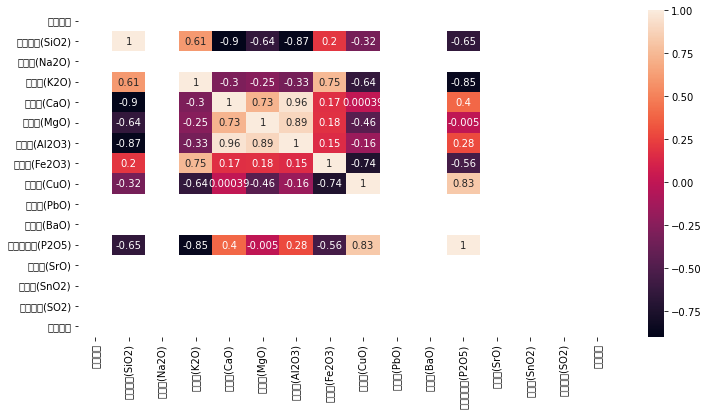

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(KW.corr(), annot=True)

<AxesSubplot:>

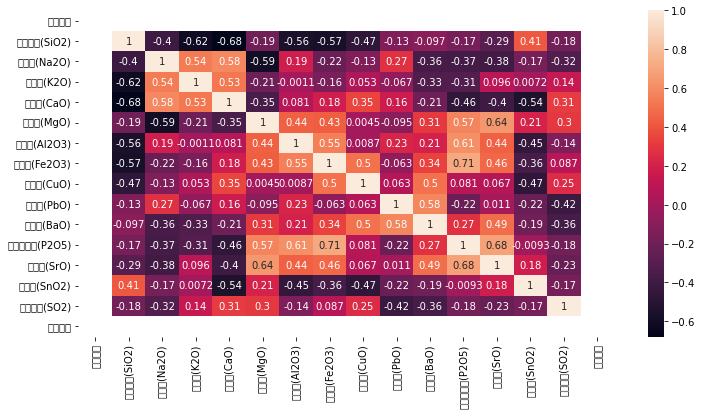

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(KN.corr(), annot=True)

<AxesSubplot:>

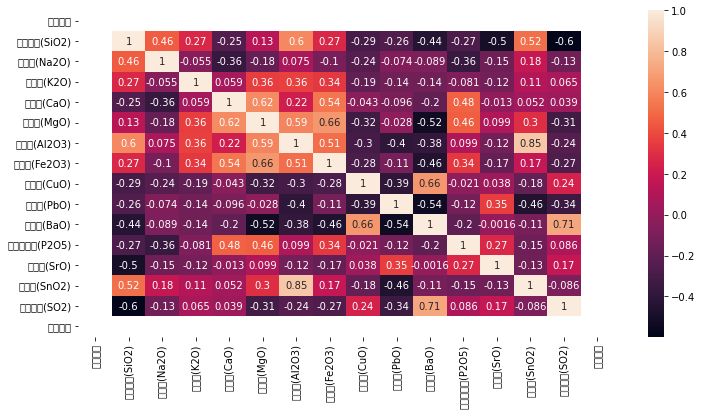

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(PBW.corr(), annot=True)

<AxesSubplot:>

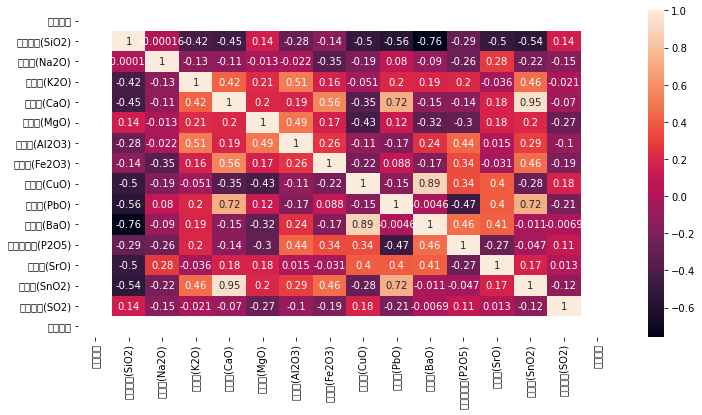

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(PBN.corr(), annot=True)

<AxesSubplot:>

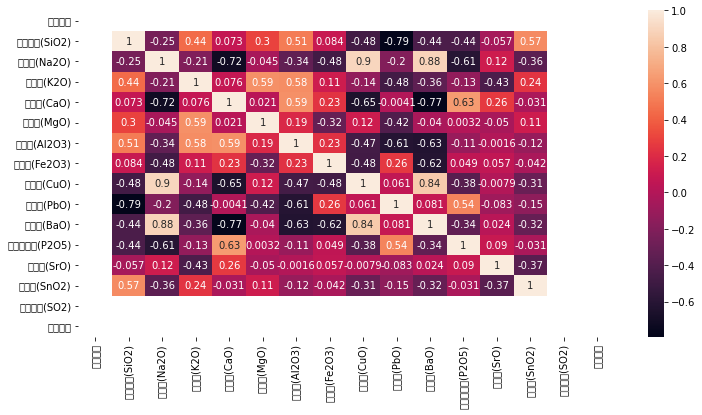

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(PBM.corr(), annot=True)